## **Project Name:** EMIPredict AI - Intelligent Financial Risk Assessment Platform

##### **Project Type**    - EDA & Machine Learning
##### **Contribution**    - Individual

### **Project Summary -**
EMIPredict AI is an intelligent financial risk assessment platform designed for FinTech and banking applications, enabling real-time EMI eligibility classification and maximum EMI prediction using machine learning models. The project utilizes a large, curated dataset of 400,000 financial records with comprehensive feature engineering, MLflow experiment tracking, and Streamlit web deployment to automate loan approvals and deliver actionable insights for lenders and customers. By integrating classification and regression models, EMIPredict AI streamlines risk evaluation, improves loan decision accuracy, and enhances operational efficiency for financial institutions.

### **GitHub Link -**
https://github.com/gvdharun/EMIPredict-AI---Intelligent-Financial-Risk-Assessment-Platform.git

### **Problem Statement -**
Build a comprehensive financial risk assessment platform that integrates machine learning models with MLflow experiment tracking to create an interactive web application for EMI prediction.

Nowadays, people struggle to pay EMI due to poor financial planning and inadequate risk assessment. This project aims to solve this critical issue by providing data-driven insights for better loan decisions.

# ***Let's Begin !***

## ***1. Data Loading & Preprocessing:***

Import Libraries:

In [153]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score

Dataset Loading:

In [2]:
# Loading dataset
try:
    emi_df = pd.read_csv('data/emi_prediction_dataset.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")

C:\Users\Dharun G V\AppData\Local\Temp\ipykernel_19696\1199217471.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  emi_df = pd.read_csv('data/emi_prediction_dataset.csv')


Dataset First view:

In [3]:
emi_df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


Dataset Rows & Columns:

In [4]:
# Dataset row and column count
print(f'Rows: {emi_df.shape[0]}')
print(f'Columns: {emi_df.shape[1]}')

Rows: 404800
Columns: 27


Dataset Information:

In [5]:
# Dataset information
emi_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

**Duplicate values:** 

In [6]:
# Duplicate rows
print(f'Duplicate rows: {emi_df.duplicated().sum()}')

Duplicate rows: 0


**Missing values / Null values:**

In [7]:
# Missing values
pd.DataFrame({'Missing values': emi_df.isnull().sum(),
              'Missing values %': (emi_df.isnull().mean()) * 100})

,Missing values,Missing values %
age,0,0.000000
gender,0,0.000000
marital_status,0,0.000000
education,2404,0.593874
monthly_salary,0,0.000000
employment_type,0,0.000000
years_of_employment,0,0.000000
company_type,0,0.000000
house_type,0,0.000000
monthly_rent,2426,0.599308


**Understanding variables:**

In [8]:
# Understanding the target variable
emi_df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

**Description:**

In [9]:
# Describe the target variable
emi_df.describe()

,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,404800.000000,402374.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,402380.000000,402449.000000,4.048000e+05,404800.000000,404800.000000
mean,5.364079,5828.446490,2.940425,1.940425,4624.575593,4066.253706,5687.497777,12804.999506,7119.309783,4543.407609,700.856223,96769.051731,3.708554e+05,29.126677,6763.602156
std,6.079135,8648.604639,1.075199,1.075199,5061.074401,7319.344289,3392.671132,6993.853745,4510.447300,7034.901139,88.435548,81373.053976,3.451945e+05,18.100854,7741.263317
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,0.000000,1400.000000,1.000000e+04,3.000000,500.000000
25%,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,654.000000,38400.000000,1.240000e+05,15.000000,500.000000
50%,3.200000,0.000000,3.000000,2.000000,3000.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,701.000000,74000.000000,2.360000e+05,25.000000,4211.200000
75%,7.200000,10600.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,8000.000000,748.000000,130600.000000,4.940000e+05,40.000000,9792.000000
max,36.000000,80000.000000,5.000000,4.000000,15000.000000,25000.000000,30300.000000,71200.000000,42900.000000,56300.000000,1200.000000,891500.000000,1.500000e+06,84.000000,91040.400000


**Checking Unqiues Values:**

In [10]:
# Unique values in the target variable
emi_df.nunique()

age                          41
gender                        8
marital_status                2
education                     4
monthly_salary            13662
employment_type               3
years_of_employment         356
company_type                  5
house_type                    3
monthly_rent               4396
family_size                   5
dependents                    5
school_fees                 132
college_fees                202
travel_expenses             284
groceries_utilities         544
other_monthly_expenses      373
existing_loans                2
current_emi_amount          508
credit_score                427
bank_balance              12261
emergency_fund             5486
emi_scenario                  5
requested_amount           1491
requested_tenure             82
emi_eligibility               3
max_monthly_emi           15383
dtype: int64

#### **Dataset Overview**

- **Rows:** 404,800  
- **Columns:** 27  

| Column               | Non-Null Count | Data Type | Missing Values (%) |
|----------------------|----------------|-----------|--------------------|
| age                  | 404,800        | object    | 0.00%              |
| gender               | 404,800        | object    | 0.00%              |
| marital_status       | 404,800        | object    | 0.00%              |
| education            | 402,396        | object    | 0.59%              |
| monthly_salary       | 404,800        | object    | 0.00%              |
| employment_type      | 404,800        | object    | 0.00%              |
| years_of_employment  | 404,800        | float64   | 0.00%              |
| company_type         | 404,800        | object    | 0.00%              |
| house_type           | 404,800        | object    | 0.00%              |
| monthly_rent         | 402,374        | float64   | 0.60%              |
| family_size          | 404,800        | int64     | 0.00%              |
| dependents           | 404,800        | int64     | 0.00%              |
| school_fees          | 404,800        | float64   | 0.00%              |
| college_fees         | 404,800        | float64   | 0.00%              |
| travel_expenses      | 404,800        | float64   | 0.00%              |
| groceries_utilities  | 404,800        | float64   | 0.00%              |
| other_monthly_expenses | 404,800      | float64   | 0.00%              |
| existing_loans       | 404,800        | object    | 0.00%              |
| current_emi_amount   | 404,800        | float64   | 0.00%              |
| credit_score         | 402,380        | float64   | 0.60%              |
| bank_balance         | 402,374        | object    | 0.60%              |
| emergency_fund       | 402,449        | float64   | 0.58%              |
| emi_scenario         | 404,800        | object    | 0.00%              |
| requested_amount     | 404,800        | float64   | 0.00%              |
| requested_tenure     | 404,800        | int64     | 0.00%              |
| emi_eligibility      | 404,800        | object    | 0.00%              |
| max_monthly_emi      | 404,800        | float64   | 0.00%              |

- **Duplicates:** None  
- **Key notes:**  
  - Some columns have minor missing values (~0.58-0.60%), mainly in `education`, `monthly_rent`, `credit_score`, `bank_balance`, and `emergency_fund`.  
  - Several columns are categorical (object type) requiring encoding during preprocessing.  
  - Numerical columns vary from floats to integers and will require scaling during modeling.

This dataset overview provides a foundational understanding for data cleaning, preprocessing, and feature engineering tasks essential for effective financial machine learning modeling.

---

### ***Preprocessing of Data:***

In [11]:
# Checking  data types
emi_df.dtypes

age                        object
gender                     object
marital_status             object
education                  object
monthly_salary             object
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance               object
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object

In [12]:
# Handle missing values:
# Fill numeric missing values with median for stability
numeric_cols = ['monthly_rent', 'credit_score', 'bank_balance', 'emergency_fund']
for col in numeric_cols:
    if emi_df[col].dtype == 'object':  # convert if needed (like 'education')
        emi_df[col] = pd.to_numeric(emi_df[col], errors='coerce')
    median_val = emi_df[col].median()
    emi_df[col].fillna(median_val, inplace=True)

# For categorical missing data, impute with mode
categorical_cols = ['education']
for col in categorical_cols:
    mode_val = emi_df[col].mode()[0]
    emi_df[col].fillna(mode_val, inplace=True)

# Convert appropriate columns to correct data types
emi_df['age'] = pd.to_numeric(emi_df['age'], errors='coerce')
emi_df['monthly_salary'] = pd.to_numeric(emi_df['monthly_salary'], errors='coerce')
emi_df['bank_balance'] = pd.to_numeric(emi_df['bank_balance'], errors='coerce')

In [13]:
emi_df.isnull().sum()

age                          3
gender                       0
marital_status               0
education                    0
monthly_salary            1993
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent                 0
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score                 0
bank_balance                 0
emergency_fund               0
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [14]:
# For remaining numeric NaNs from conversion errors, fill with median
emi_df['monthly_salary'].fillna(emi_df['monthly_salary'].median(), inplace=True)

# Save cleaned dataframe if needed
# df.to_csv('financial_data_cleaned.csv', index=False)

In [15]:
# Dropping age row with null value
emi_df.dropna(subset=['age'], inplace=True)

In [16]:
# Final check for missing values
print("Missing values after cleaning:\n", emi_df.isnull().sum())
print("Number of rows after cleaning:", emi_df.shape[0])
print("Number of columns after cleaning:", emi_df.shape[1])

Missing values after cleaning:
 age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64
Number of rows after cleaning: 404797
Number of columns after cleaning: 27


In [17]:
# Column data types
emi_df.dtypes

age                       float64
gender                     object
marital_status             object
education                  object
monthly_salary            float64
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance              float64
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object

#### ***Overview of Data Preprocessing***

1. **Missing Numeric Values Handling**
   - Converted object-type columns expected to be numeric (e.g., `monthly_rent`, `credit_score`, `bank_balance`, `emergency_fund`) to numeric types using `pd.to_numeric` with coercion to handle errors.
   - Filled missing values in these numeric columns with the median to maintain distribution stability and reduce bias.

2. **Missing Categorical Values Handling**
   - For categorical features like `education`, missing values were imputed using the mode (most frequent category) to preserve the inherent class distribution.
   - This avoids loss of data and minimizes skew from arbitrary imputation.

3. **Data Type Conversion**
   - Converted relevant columns such as `age`, `monthly_salary`, and `bank_balance` to numeric types with error coercion to ensure data consistency for modeling.

4. **Row Dropping for Critical Missing Data**
   - Remaining rows with missing values in critical columns like `age` were dropped due to very low occurrence, ensuring clean dataset integrity without significant data loss.

5. **Validation**
   - Checked for missing values post-processing to confirm complete cleanup.
   - The dataset size after cleaning remained nearly intact (approx. 404,797 rows from 404,800).

This preprocessing ensures a clean, consistent dataset ready for feature engineering and machine learning model training.

---

## ***2. Exploratory Data Analysis***

#### **Univariate analysis**
Univariate analysis helps you understand the distribution and frequency of individual variables in your dataset.

Chart 1: Histogram for 'age'

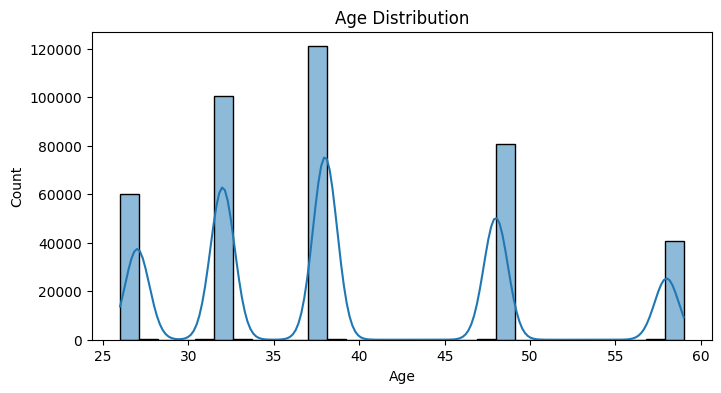

In [18]:
# 1. Histogram for 'age'
plt.figure(figsize=(8,4))
sns.histplot(emi_df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Chart Type: ***Histogram***

A **histogram with KDE (Kernel Density Estimation)** overlay was selected for visualizing the age distribution because it provides a comprehensive way to understand both the frequency of discrete age bins (via bars) and the overall underlying distribution shape (via the smoothed density curve). This combination is particularly effective when working with large datasets, as it highlights both the counts and patterns in the data.

#### Insights from the Chart

- The age distribution is **multi-modal**, with significant peaks at around ages 27, 32, 38, 49, and 59. This suggests the presence of distinct cohorts or age groupings within the data.
- The highest concentration is observed around ages 38, 32, and 49, indicating these are the most common ages in the dataset.
- The distribution is irregular, showing that certain ages are much more represented than others—possibly due to data collection methods (such as binning or grouping) or reflecting real demographic structure.
- There are noticeable gaps between the peaks, suggesting lower representation or sparsity for those age ranges.
---

Chart 2: Countplot for 'gender'

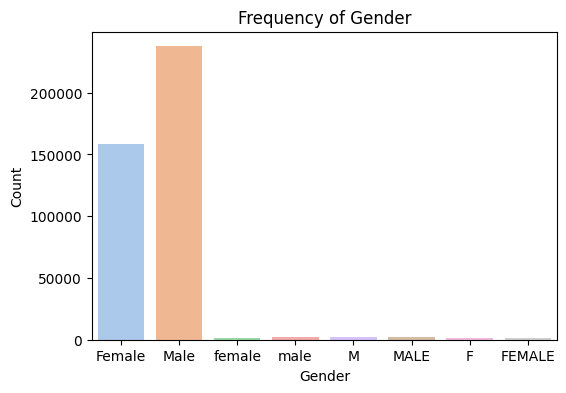

In [19]:
# 2. Countplot for 'gender'
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=emi_df, palette='pastel', hue='gender')
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Chart type: ***Count Plot***

A **count plot** was selected for visualizing gender frequency because it is the most effective way to represent categorical data and compare count values across multiple categories. Bar charts clearly display the distribution and frequency of each gender entry, making it easy to spot inconsistencies, trends, and outliers in the dataset.

#### Insights from the Chart

- The categories "Male" and "Female" overwhelmingly dominate the dataset, indicating most entries use these standard terms for gender.
- Several variations such as "male", "female", "M", "F", "MALE", "FEMALE" exist, but their frequencies are much lower, suggesting inconsistencies in data entry.
- This chart highlights the need for **data cleaning** and standardization, as multiple equivalent labels for gender reduce the clarity and utility of gender-based analysis.
- Addressing these variations by consolidating them could greatly enhance the quality and interpretability of subsequent analysis.
---

Chart 3: Boxplot for 'monthly_salary' to observe range and outliers

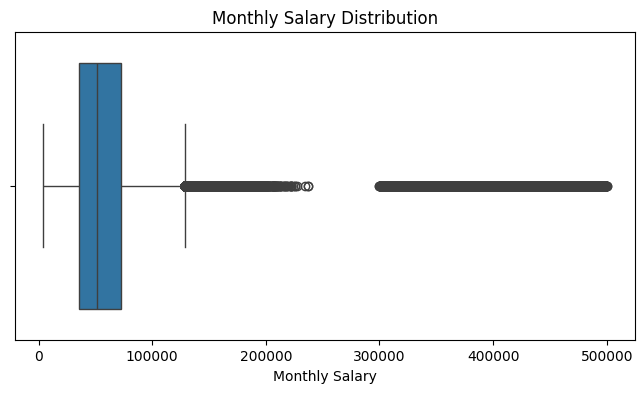

In [20]:
# 3. Boxplot for 'monthly_salary' to observe range and outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=emi_df['monthly_salary'])
plt.title('Monthly Salary Distribution')
plt.xlabel('Monthly Salary')
plt.show()

#### Chart type: ***Boxplot***

A **boxplot** was chosen to visualize monthly salary distribution because it effectively highlights the central tendency, spread, and outliers in continuous data. Boxplots are ideal for detecting skewness and spotting anomalies in variables like salary, especially when there is a wide range of values or potential outliers.

#### Insights from the Chart

- The majority of monthly salaries are concentrated towards the lower end of the scale, as indicated by the dense box on the left.
- There are numerous outliers—points that lie far to the right of the main box—showing people earning significantly higher salaries than the rest.
- The data is highly skewed, possibly due to a subset of entries with exceptionally high salaries, which may warrant further investigation for data quality, errors, or genuine disparities.
- This visualization recommends further cleaning or transforming the salary data before statistical modeling.
---

Chart 4: Bar plot for 'education' categories frequency

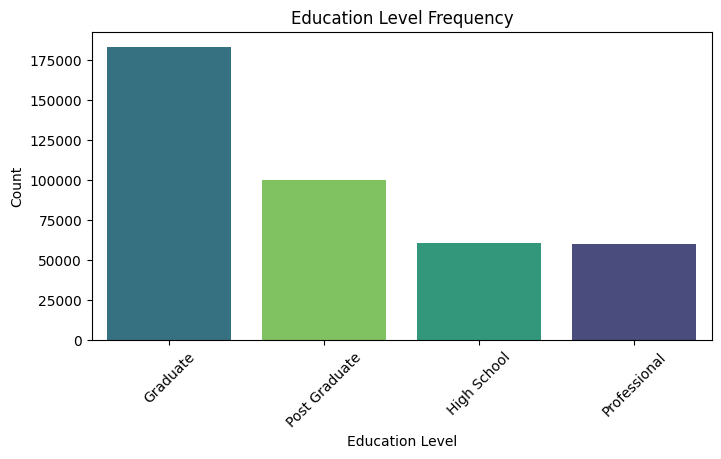

In [21]:
# 4. Bar plot for 'education' categories frequency
plt.figure(figsize=(8,4))
edu_order = emi_df['education'].value_counts().index
sns.countplot(x='education', data=emi_df, order=edu_order, palette='viridis', hue='education')
plt.title('Education Level Frequency')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Chart type: ***Bar Chart***

A **bar chart** was chosen to visualize education level frequency because it clearly displays count comparisons across categorical education levels. Bar charts make it simple to identify which categories dominate and detect patterns or imbalances in the dataset.

#### Insights from the Chart

- "Graduate" is the most frequently reported education level, followed by "Post Graduate". This suggests a majority of the dataset has a university-level education or higher.
- "High School" and "Professional" are less common, indicating these groups are underrepresented compared to the others.
- The distribution highlights the educational composition of the population, suggesting the dataset may be biased towards individuals with advanced qualifications.
- These insights can inform further analysis and model building, such as understanding correlations between education and other variables.
---

Chart 5: Histogram of 'credit_score'

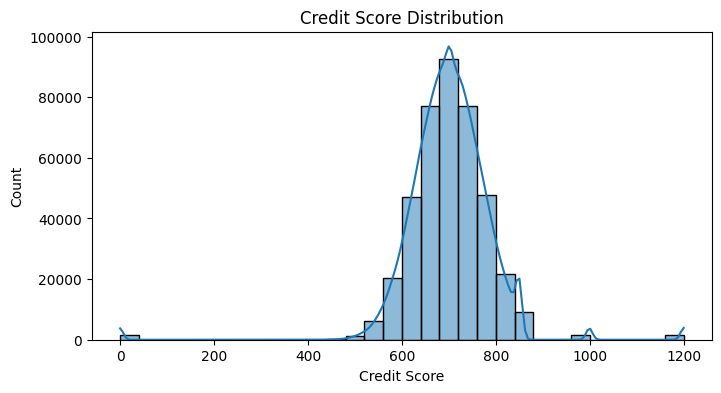

In [22]:
# 5. Histogram of 'credit_score'
plt.figure(figsize=(8,4))
sns.histplot(emi_df['credit_score'], bins=30, kde=True)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

#### Chart type: ***Histogram*** 

A **histogram with KDE overlay** was chosen to represent the credit score distribution because it simultaneously shows the frequency of credit score bins (via bars) and the estimated probability density (via the smooth curve). This dual-visualization method helps in understanding both the discrete and the continuous structure of the credit score data.

#### Insights from the Chart

- The credit score data is highly **normally distributed**, centered mostly around the 700 range, with most values falling between 600 and 800.
- There are a few extreme outliers on both the low and high ends (around 0 and above 1000), suggesting possible data entry anomalies or special cases that should be verified during data cleaning.
- The pronounced bell-shaped curve is typical for credit scores, reflecting a majority in the mid-to-high range and relatively fewer extreme values.
- This plot confirms the expected distribution, but also flags potential outliers for further investigation.
---

Chart 6: Pie chart for 'employment_type' proportions

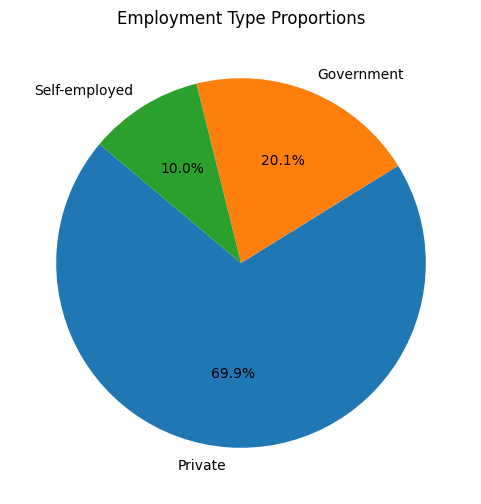

In [23]:
# 6. Pie chart for 'employment_type' proportions
plt.figure(figsize=(6,6))
employment_counts = emi_df['employment_type'].value_counts()
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Employment Type Proportions')
plt.show()

#### Chart type: ***Pie Chart***

A **pie chart** was chosen to visualize employment type proportions because it effectively illustrates the percentage share of each category within a whole. Pie charts are ideal for showing how a dataset is divided among a limited set of distinct groups, helping immediately communicate relative dominance and rarity.

#### Insights from the Chart

- "Private" employment overwhelmingly constitutes the majority, representing **69.9%** of the dataset, which is more than twice the combined share of "Government" and "Self-employed".
- "Government" employees account for **20.1%**, and "Self-employed" for **10.0%**, indicating these segments are significantly smaller.
- The visual dominance of the private sector may reflect broader labor trends, such as market orientation or dataset sampling bias.
- These insights can support interpretation of subsequent analysis, as employment type may influence other factors like income, stability, and risk.
---

#### **Bivariate Analysis** (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)
Bivariate analysis helps uncover relationships between two variables

Numerical - Categorical

Chart 7: Boxplot - Monthly Salary by Education Level

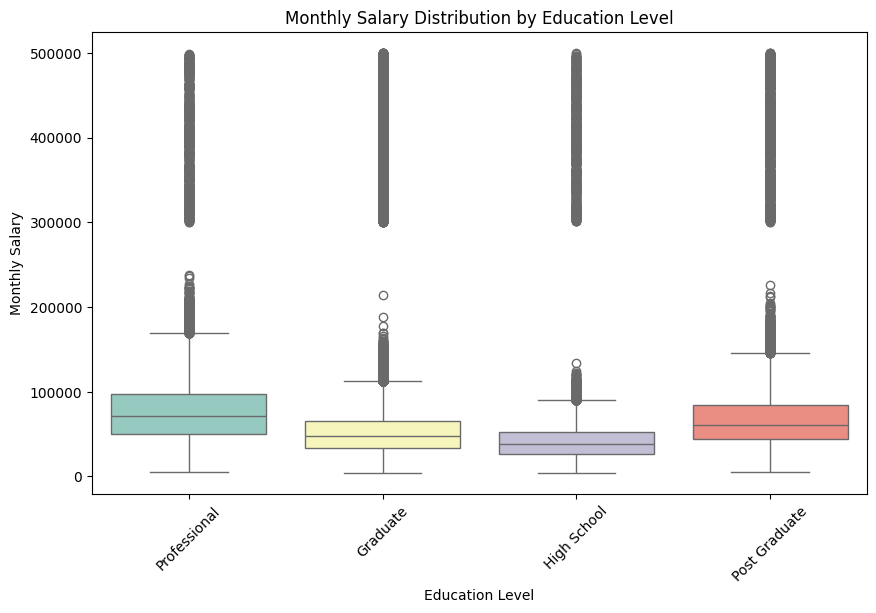

In [24]:
# 7. Boxplot: Monthly Salary by Education Level
plt.figure(figsize=(10,6))
sns.boxplot(x='education', y='monthly_salary', data=emi_df, palette='Set3', hue='education')
plt.title('Monthly Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Monthly Salary')
plt.xticks(rotation=45)
plt.show()

#### Why This Chart Was Chosen

A **boxplot grouped by education level** was chosen to visualize monthly salary distribution because it allows direct comparison of the spread, median, and outliers for each education group. Grouped boxplots are essential for examining how a continuous variable (salary) varies across different categories (education levels) and for identifying trends or disparities.

#### Insights from the Chart

- Individuals with "Professional" and "Post Graduate" education tend to have higher median salaries compared to those with "Graduate" and "High School" education, suggesting a positive relationship between higher education and earnings.
- All groups display significant salary outliers, indicating that some individuals in each category earn exceptionally high salaries relative to the majority.
- The "High School" group typically occupies the lower end of the salary spectrum, while "Professional" and "Post Graduate" have both the highest medians and the widest spread, reflecting more earnings variability in advanced education levels.
- This visualization succinctly reveals how education drives salary differences and exposes extremes that may warrant deeper analysis.
---

Chart 8: Violin plot - Credit Score by Employment Type

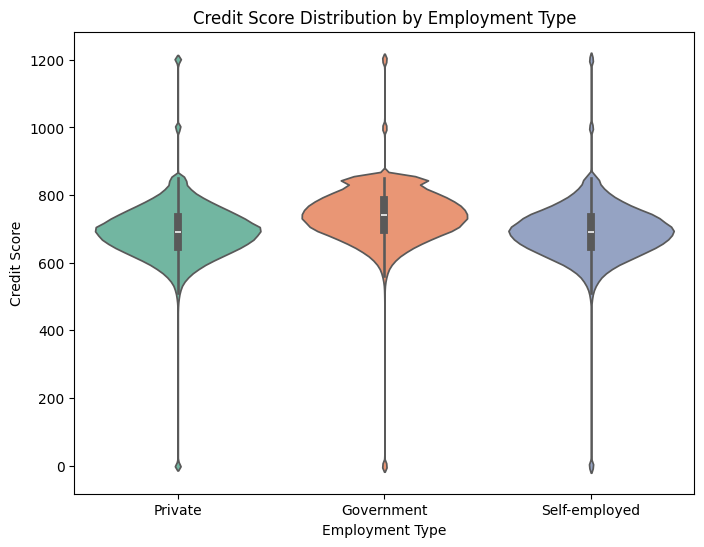

In [25]:
# 8. Violin plot: Credit Score by Employment Type
plt.figure(figsize=(8,6))
sns.violinplot(x='employment_type', y='credit_score', data=emi_df, palette='Set2', hue='employment_type')
plt.title('Credit Score Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Credit Score')
plt.show()

#### Why This Chart Was Chosen

A **violin plot grouped by employment type** was selected to display credit score distribution because it combines the features of a boxplot (showing medians and interquartile ranges) with a kernel density estimate (showing the distribution's shape and possible multimodality). This makes it particularly well-suited for comparing the full distribution of a continuous variable (credit score) across multiple categories (employment types).

#### Insights from the Chart

- The median credit score is slightly higher for "Government" employees than for "Private" and "Self-employed" groups, as indicated by the position of the white dot.
- All groups have similar spread and central tendency, but "Government" employees may have a slightly narrower and higher-centered distribution.
- There are long tails and several outliers in all groups, with a handful of exceptionally low and high scores, suggesting either rare cases or data anomalies.
- The violin's width exposes the density: most individuals in all groups cluster between scores of about 600 and 800.
---

Numerical - Numerical

Chart 9: Scatter Plot - Relationship between 'monthly_salary' and 'max_monthly_emi'

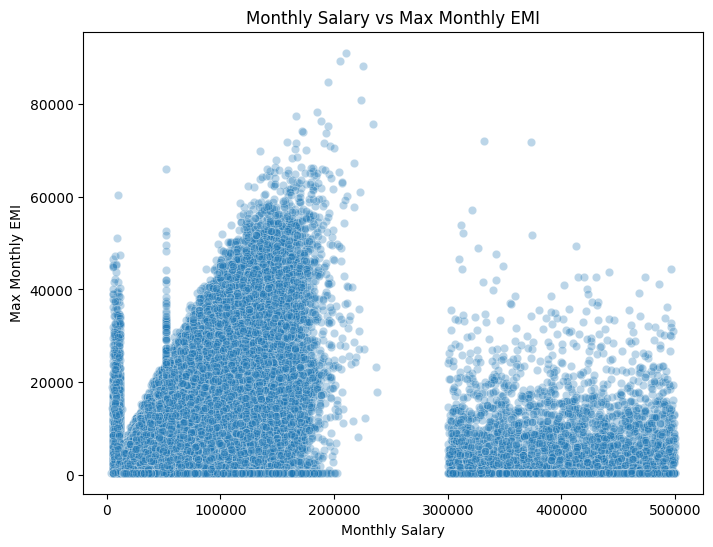

In [26]:
# 9. Scatter Plot: Relationship between 'monthly_salary' and 'max_monthly_emi'
plt.figure(figsize=(8,6))
sns.scatterplot(x='monthly_salary', y='max_monthly_emi', data=emi_df, alpha=0.3)
plt.title('Monthly Salary vs Max Monthly EMI')
plt.xlabel('Monthly Salary')
plt.ylabel('Max Monthly EMI')
plt.show()

#### Why This Chart Was Chosen

A **scatter plot** was chosen to visualize the relationship between monthly salary and max monthly EMI because it is the best way to examine possible correlations between two continuous variables. Scatter plots reveal the direction, strength, and any unusual patterns or groupings within the data, making them indispensable for bivariate analysis.

#### Insights from the Chart

- There is a positive relationship between monthly salary and max monthly EMI: individuals with higher salaries can afford higher EMIs, as most points trend upward.
- The plot shows clear clusters and some bands or gaps, which may indicate specific salary brackets or discontinuities in data collection.
- There are a few outliers with extremely high salaries and EMIs, as well as some vertical bands at fixed salary values, highlighting possible salary caps or reporting patterns.
- This visualization can inform further statistical analysis, such as regression modeling, and helps identify whether additional data preprocessing or segmentation is needed.
---

Chart 10: Jointplot with Regression: 'credit_score' vs 'current_emi_amount'

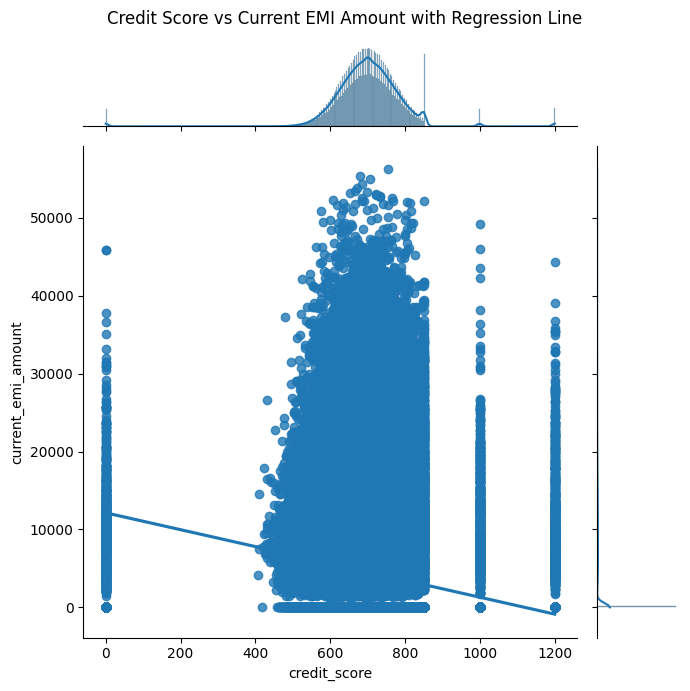

In [27]:
# 10. Jointplot with Regression: 'credit_score' vs 'current_emi_amount'
sns.jointplot(x='credit_score', y='current_emi_amount', data=emi_df, kind='reg', height=7)
plt.suptitle('Credit Score vs Current EMI Amount with Regression Line')
plt.tight_layout()
plt.show()

#### Why This Chart Was Chosen

A **joint plot with regression line** was selected because it simultaneously visualizes the relationship between two continuous variables ("credit_score" and "current_emi_amount") and their marginal distributions. The joint plot combines a scatter plot with histograms and regression analysis, providing a holistic view that can reveal both trends and distributional patterns.

#### Insights from the Chart

- The scatter plot shows a concentration of data points in the credit score range of 600–800 and current EMI up to about 50,000, consistent with standard patterns in credit and loan data.
- The **regression line is slightly downward sloping**, indicating a weak negative correlation: as credit score increases, the typical EMI amount tends to decrease, albeit not strongly.
- There are several outliers with extremely high EMI amounts and credit scores close to 0 or above 1000, which may represent errors or very rare profiles.
- The marginal histograms confirm that credit scores cluster around normal values (centered ~700), while EMI amounts are mostly condensed at lower ranges with some extreme peaks.
---

Categorical - Categorical

Chart 11: Crosstab and Heatmap for 'gender' vs 'emi_eligibility'

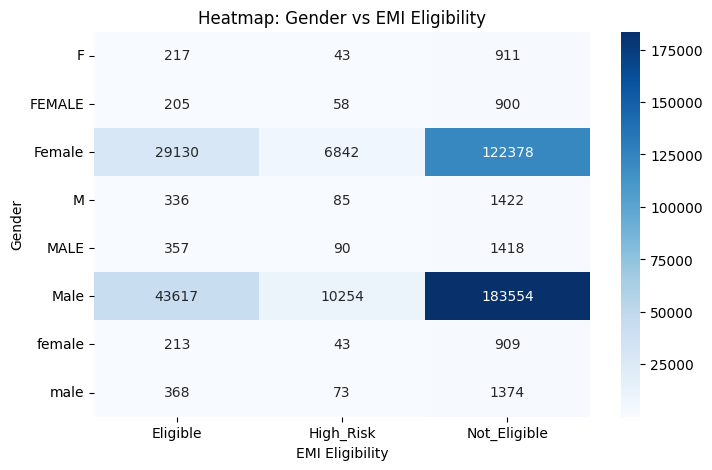

In [28]:
# 11. Crosstab and Heatmap for 'gender' vs 'emi_eligibility'
ct = pd.crosstab(emi_df['gender'], emi_df['emi_eligibility'])
plt.figure(figsize=(8,5))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Gender vs EMI Eligibility')
plt.xlabel('EMI Eligibility')
plt.ylabel('Gender')
plt.show()

#### Why This Chart Was Chosen

A **heatmap** was chosen to visualize the relationship between gender and EMI eligibility because it effectively highlights counts across two categorical axes, using color intensity for quick pattern recognition. Heatmaps are ideal for contingency tables, making it easy to spot combinations with the highest and lowest frequencies and assess groupwise trends at a glance.

#### Insights from the Chart

- The most frequent labels are "Female" and "Male" (with proper casing), outnumbering other gender representations by a large margin, consistent with observed data entry inconsistencies earlier.
- The highest counts for "Not Eligible" EMI status are among "Male" and "Female", meaning most people in the dataset do not meet EMI eligibility, regardless of gender.
- "Eligible" status is also most prevalent for "Male" and "Female", while variants like "M", "F", "male", and "female" are seen far less frequently and contribute negligibly to eligibility outcomes.
- Visualizing this cross-tabulation confirms a dominant presence of standard gender labels and allows targeting of categories for data cleaning or further demographic analysis.
---

Chart 12: Stacked Bar Chart for 'employment_type' vs 'emi_eligibility'

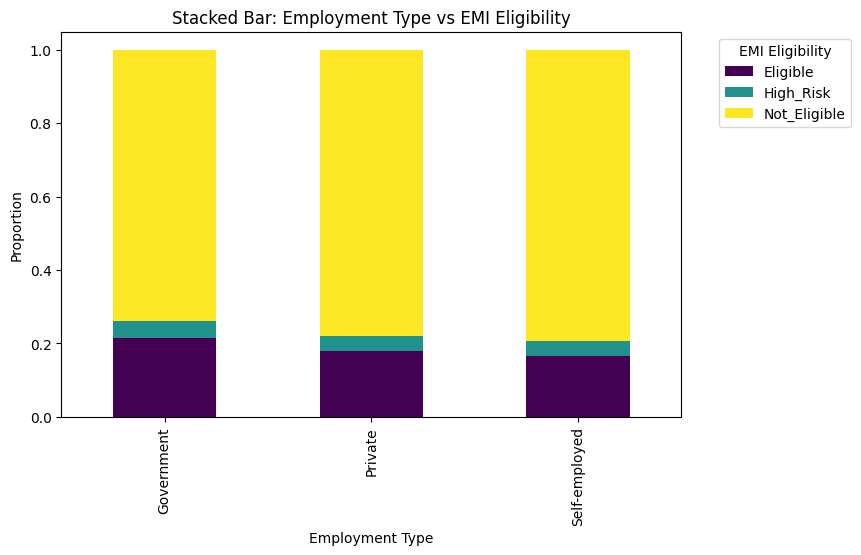

In [29]:
# 12. Stacked Bar Chart for 'employment_type' vs 'emi_eligibility'
cross_tab = pd.crosstab(emi_df['employment_type'], emi_df['emi_eligibility'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))
plt.title('Stacked Bar: Employment Type vs EMI Eligibility')
plt.xlabel('Employment Type')
plt.ylabel('Proportion')
plt.legend(title='EMI Eligibility', bbox_to_anchor=(1.05, 1))
plt.show()

#### Why This Chart Was Chosen

A **stacked bar chart** was chosen because it is ideal for comparing proportions of categorical subgroups ("EMI Eligibility" categories) within main groups ("Employment Type"). Stacked bar charts quickly reveal how categories are distributed and make it easy to assess relative shares and group-wise comparison across all the variables.

#### Insights from the Chart

- Across all employment types ("Government", "Private", "Self-employed"), the proportion of "Not Eligible" for EMI is noticeably dominant, covering the majority of each bar.
- "Eligible" and "High Risk" EMI categories represent much smaller proportions, but "Government" employees have a slightly higher share of "Eligible" compared to the other groups.
- Patterns are nearly consistent between all three employment types, indicating the EMI eligibility profile is largely independent of employment category in this dataset.
- This visualization helps identify group trends for further analysis, such as targeting support initiatives or understanding eligibility barriers.
---

#### **Multivariate Analysis**

Multivariate analysis examines the relationship between three or more variables simultaneously. This helps uncover complex patterns and interactions influencing customer satisfaction (CSAT).

Chart 13: Boxplot grouped by categorical variable

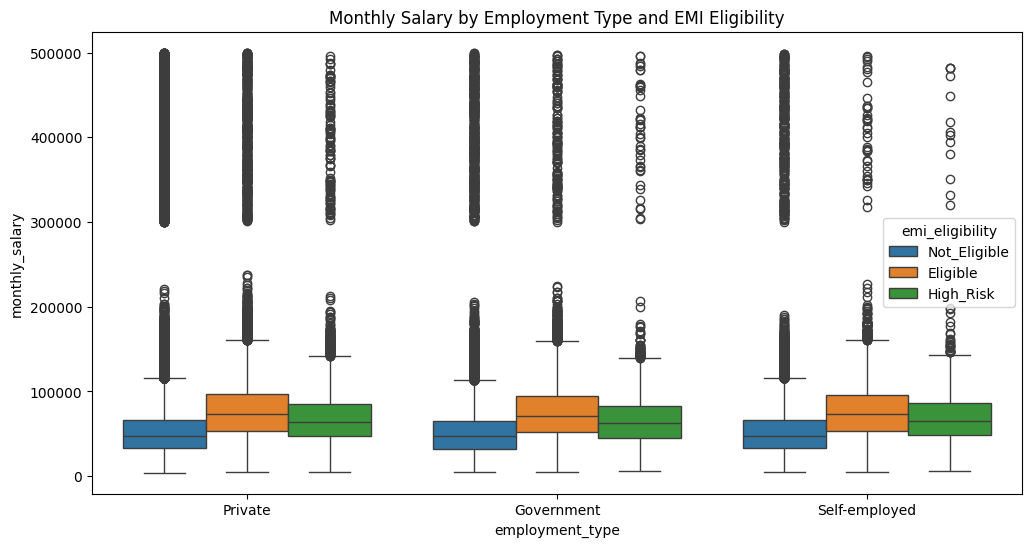

In [30]:
# 13. Boxplot grouped by categorical variable, e.g. monthly_salary by employment_type and emi_eligibility
plt.figure(figsize=(12,6))
sns.boxplot(data=emi_df, x='employment_type', y='monthly_salary', hue='emi_eligibility')
plt.title('Monthly Salary by Employment Type and EMI Eligibility')
plt.show()

#### Why This Chart Was Chosen

A **grouped boxplot** was chosen to visualize monthly salary by employment type and EMI eligibility because it elegantly shows the distribution, spread, and outliers of salary data for each combination of employment category and eligibility status. Grouped boxplots are ideal for comparing how both categorical dimensions together impact the continuous variable, helping detect nuanced patterns and differences.

#### Insights from the Chart

- "Eligible" individuals tend to have higher median monthly salaries than "Not Eligible" or "High Risk" groups within every employment type, suggesting strong financial criteria for eligibility.
- The "High Risk" groups generally occupy a middle range for salary, but the spread of salaries is wide, with notable outliers across all eligibility groups and employment types.
- Salary distributions are relatively consistent in pattern across "Private", "Government", and "Self-employed" groups, with all showing large numbers of outliers at the higher end.
- The visualization highlights financial disparities, confirms eligibility's association with higher income, and can guide further segmentation for predictive modeling or policy analysis.
---

Chart 14: Correlation Heatmap

<Figure size 1000x800 with 0 Axes>

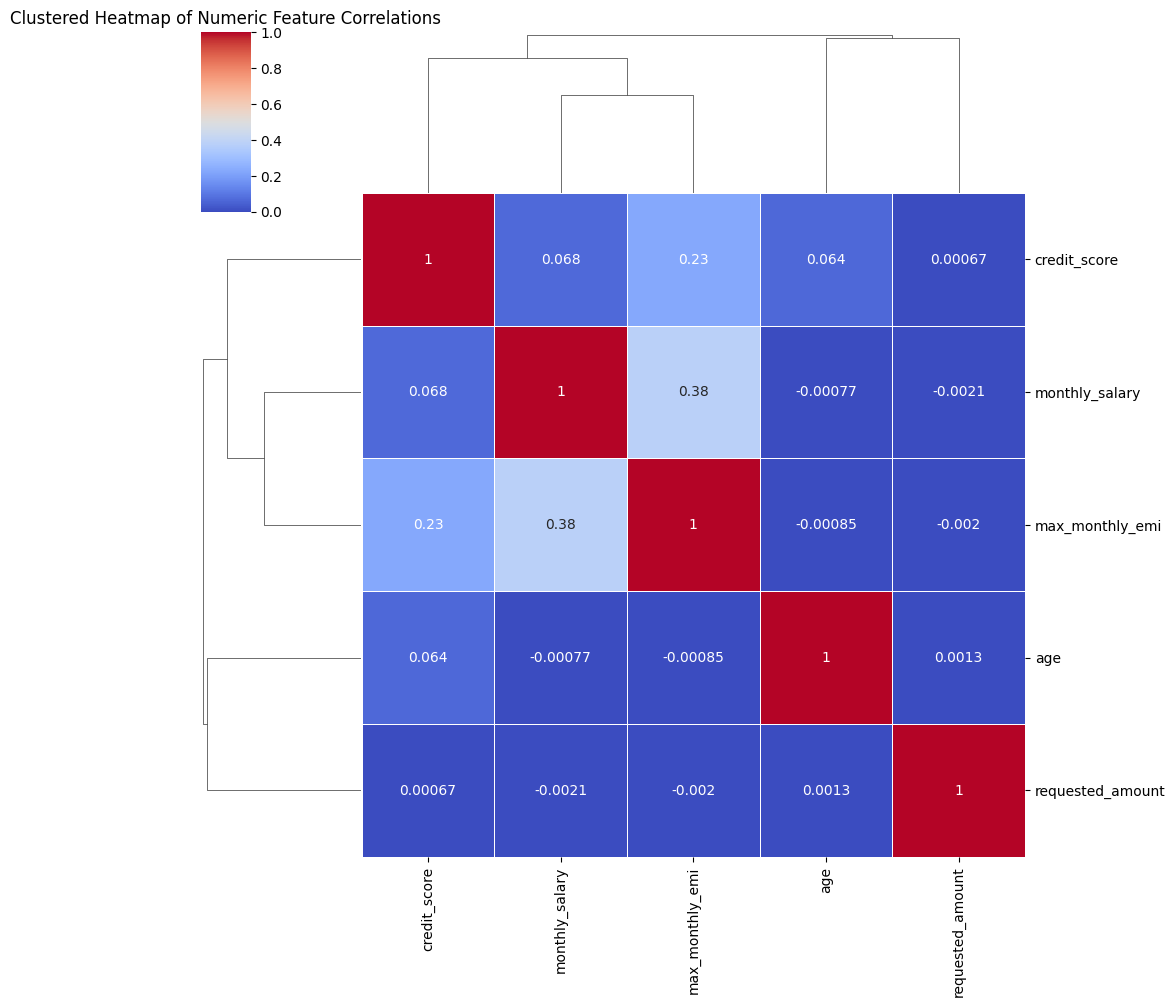

In [31]:
# 14. Clustered Heatmap for correlation of numeric features
plt.figure(figsize=(10,8))
corr = emi_df[['age', 'monthly_salary', 'credit_score', 'requested_amount', 'max_monthly_emi']].corr()
sns.clustermap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Clustered Heatmap of Numeric Feature Correlations')
plt.show()

#### Why This Chart Was Chosen

A **clustered heatmap of numeric feature correlations** was chosen because it visualizes both the strength and direction of relationships between variables, as well as the hierarchical clustering of features with similar correlation patterns. The dendrograms group features by similarity, making it easy to spot correlated clusters and structural relationships in multivariate data.

#### Insights from the Chart

- "Monthly salary" and "max monthly EMI" have the strongest positive correlation (0.38), suggesting that individuals with higher salaries can generally afford higher EMIs.
- "Credit score" is only weakly correlated with other numeric features, with the highest correlation being with "max monthly EMI" (0.23) and very little association with salary, age, or requested amount.
- "Age" and "requested amount" are largely uncorrelated with the other variables, as indicated by near-zero values throughout.
- The clustering highlights the close association between salary and EMI, while isolating less correlated features on separate branches.
---

Chart 15: Pair Plot

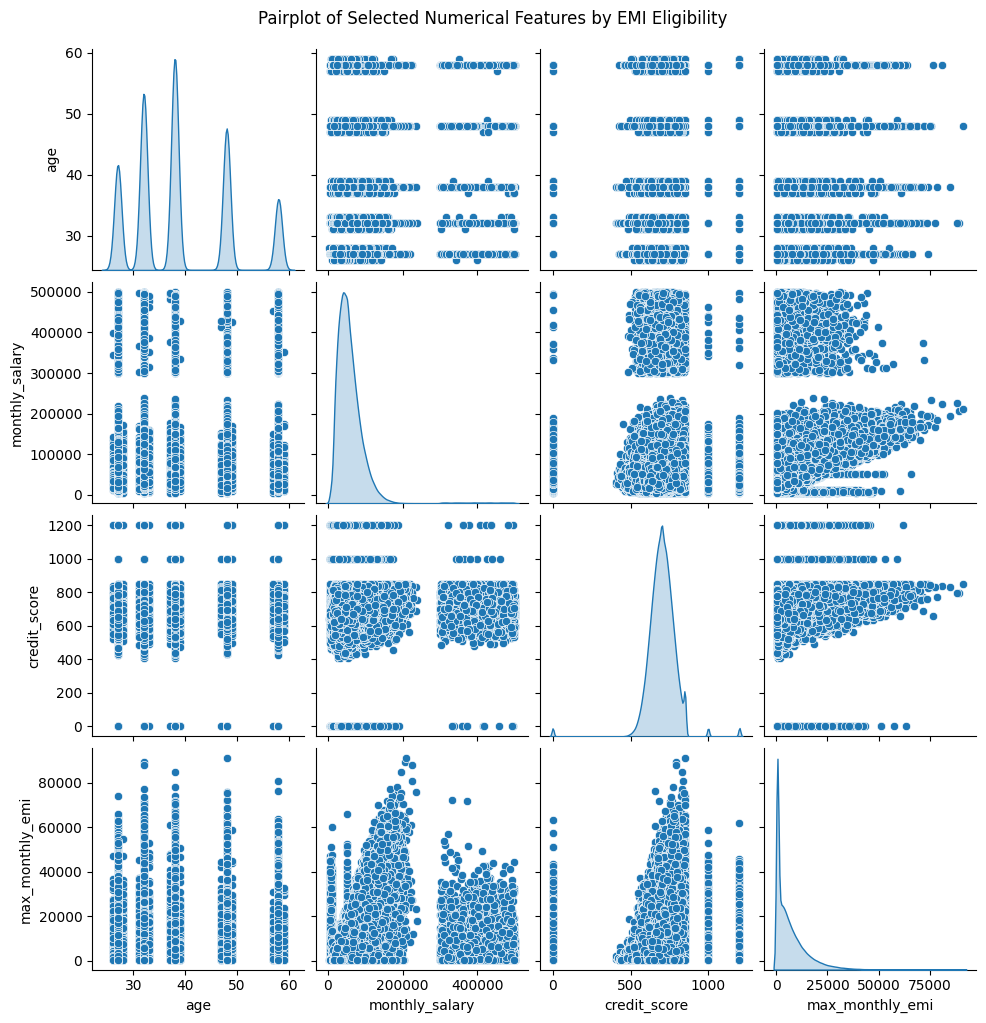

In [32]:
# 15. Pairplot for selected numerical variables
sns.pairplot(emi_df[['age', 'monthly_salary', 'credit_score', 'max_monthly_emi']], diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Features by EMI Eligibility', y=1.02)
plt.show()

#### Why This Chart Was Chosen

A **pairplot** was chosen because it simultaneously visualizes distributions and pairwise relationships among multiple numerical features, stratified by EMI eligibility. Pairplots offer both univariate insights (along the diagonal) and bivariate scatter plots (off-diagonal), making it a comprehensive exploratory tool for multivariate numeric data.

#### Insights from the Chart

- The diagonal plots reveal the distribution for each feature: age, monthly salary, credit score, and max monthly EMI. Most show pronounced clustering and skewness, confirming earlier distribution observations.
- Off-diagonal scatter plots highlight relationships between features. For example, monthly salary and max monthly EMI display a strong positive association, while credit score and monthly salary have little visible correlation.
- Clusters and bands in the scatter plots indicate how EMI eligibility (via color/hue) segments the data—certain eligibility groups may occupy distinct ranges in salary, age, or credit score.
- The plot identifies potential feature groupings, separation between classes, and outliers, helping guide further preprocessing, feature engineering, or model selection.
---

## ***3. Feature Engineering***

- **Create derived financial ratios (debt-to-income, expense-to-income, affordability ratios)**

In [34]:
# Assuming emi_df is your cleaned DataFrame

# Debt-to-Income Ratio (excluding existing_loans)
# Considering 'current_emi_amount' as debt component here
emi_df['debt_to_income'] = emi_df['current_emi_amount'] / emi_df['monthly_salary']

# Total monthly expenses (all expense-related columns)
expense_cols = ['monthly_rent', 'school_fees', 'college_fees', 'travel_expenses', 
                'groceries_utilities', 'other_monthly_expenses']
emi_df['total_expenses'] = emi_df[expense_cols].sum(axis=1)

# Expense-to-Income Ratio
emi_df['expense_to_income'] = emi_df['total_expenses'] / emi_df['monthly_salary']

# Affordability Ratio (max monthly EMI / monthly salary)
emi_df['affordability_ratio'] = emi_df['max_monthly_emi'] / emi_df['monthly_salary']

# Preview derived ratios
print(emi_df[['debt_to_income', 'expense_to_income', 'affordability_ratio']].head())

   debt_to_income  expense_to_income  affordability_ratio
0        0.286925           0.725182             0.006053
1        0.190698           0.716279             0.032558
2        0.000000           0.413473             0.322590
3        0.000000           0.559880             0.242066
4        0.000000           1.022688             0.008726


#### Derived Financial Ratios

To enhance feature richness for financial risk assessment, the following derived ratios were created from the cleaned dataset:

- **Debt-to-Income Ratio:**  
  Calculated as current monthly EMI burden divided by monthly salary, this ratio quantifies the portion of income obligated toward existing debt payments, excluding any explicit 'existing_loans' variable.  
  
- **Total Monthly Expenses:**  
  Summation of expense-related features including rent, schooling fees, travel, groceries, and other monthly expenditures.  
 
- **Expense-to-Income Ratio:**  
  This ratio expresses how much of the monthly income is consumed by monthly expenses.  
  
- **Affordability Ratio:**  
  Using the predicted or maximum allowable monthly EMI, this ratio indicates EMI burden compatibility relative to income.  

These ratios help quantify financial capacity and risk, enabling more nuanced predictive modeling in loan eligibility and EMI amount prediction tasks.

---

- **Generate risk scoring features based on credit history and employment stability**

In [37]:
# Assuming emi_df is your cleaned DataFrame

# Risk score based on credit score (example scoring: higher score = lower risk)
def credit_risk_score(credit_score):
    if credit_score >= 750:
        return 1  # Low risk
    elif credit_score >= 650:
        return 2  # Moderate risk
    elif credit_score >= 550:
        return 3  # High risk
    else:
        return 4  # Very high risk

emi_df['credit_risk_score'] = emi_df['credit_score'].apply(credit_risk_score)

# Employment stability score based on years of employment
def employment_stability_score(years):
    if years >= 5:
        return 1  # Very stable
    elif years >= 3:
        return 2  # Stable
    elif years >= 1:
        return 3  # Moderate
    else:
        return 4  # Unstable

emi_df['employment_stability_score'] = emi_df['years_of_employment'].apply(employment_stability_score)

# Preview the computed risk scores
print(emi_df[['credit_score', 'credit_risk_score', 'years_of_employment', 'employment_stability_score']].head())

   credit_score  credit_risk_score  years_of_employment  \
0         660.0                  2                  0.9   
1         714.0                  2                  7.0   
2         650.0                  2                  5.8   
3         685.0                  2                  2.2   
4         770.0                  1                  3.4   

   employment_stability_score  
0                           4  
1                           1  
2                           1  
3                           3  
4                           2  


#### Risk Scoring Features Based on Credit History and Employment Stability

**Credit Risk Score:**

This score categorizes borrowers based on their credit score, where a higher credit score indicates lower risk:

- Score ≥ 750: Low risk (1)
- Score ≥ 650 and < 750: Moderate risk (2)
- Score ≥ 550 and < 650: High risk (3)
- Score < 550: Very high risk (4)


**Employment Stability Score:**

This score evaluates employment stability based on years of employment:

- Years ≥ 5: Very stable (1)
- Years ≥ 3 and < 5: Stable (2)
- Years ≥ 1 and < 3: Moderate (3)
- Years < 1: Unstable (4)


This approach transforms raw credit history and employment duration into interpretable risk scores, aiding in financial risk assessment modeling.

---

- **Apply categorical encoding and numerical feature scaling**

In [53]:
# Assuming emi_df is your cleaned DataFrame

# Select categorical columns for encoding
categorical_cols = ['gender', 'marital_status', 'education', 'employment_type', 'company_type', 'house_type', 
                    'existing_loans', 'emi_scenario']

# Select numerical columns for scaling
numerical_cols = emi_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize encoders and scalers
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
scaler = StandardScaler()

# Fit and transform categorical columns
encoded_cat = encoder.fit_transform(emi_df[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))

# Scale numerical columns
scaled_num = scaler.fit_transform(emi_df[numerical_cols])
scaled_num_df = pd.DataFrame(scaled_num, columns=numerical_cols)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([scaled_num_df.reset_index(drop=True), encoded_cat_df.reset_index(drop=True)], axis=1)

print(processed_df.head())

c:\Users\Dharun G V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        age  monthly_salary  years_of_employment  monthly_rent  family_size  \
0 -0.094139        0.534346            -0.734329      1.645341     0.055411   
1 -0.094139       -0.877233             0.269101     -0.670983    -0.874648   
2 -0.094139        0.615206             0.071705     -0.670983     0.985470   
3  2.055575        0.169322            -0.520483     -0.670983     1.915529   
4  0.980718       -0.050154            -0.323087     -0.670983     0.985470   

   dependents  school_fees  college_fees  travel_expenses  \
0    0.055411    -0.913750     -0.555546         0.445812   
1   -0.874648     0.093939     -0.555546        -1.263755   
2    0.985470    -0.913750     -0.555546         1.330071   
3    1.915529     1.338732     -0.555546         0.151059   
4    0.985470     0.943560      2.354573        -0.615298   

   groceries_utilities  ...  company_type_Mid-size  company_type_Small  \
0             0.957273  ...                    1.0                 0.0   
1         

In [54]:
# Checking column names
processed_df.columns

Index(['age', 'monthly_salary', 'years_of_employment', 'monthly_rent',
       'family_size', 'dependents', 'school_fees', 'college_fees',
       'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
       'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund',
       'requested_amount', 'requested_tenure', 'max_monthly_emi',
       'debt_to_income', 'total_expenses', 'expense_to_income',
       'affordability_ratio', 'credit_risk_score',
       'employment_stability_score', 'gender_FEMALE', 'gender_Female',
       'gender_M', 'gender_MALE', 'gender_Male', 'gender_female',
       'gender_male', 'marital_status_Single', 'education_High School',
       'education_Post Graduate', 'education_Professional',
       'employment_type_Private', 'employment_type_Self-employed',
       'company_type_MNC', 'company_type_Mid-size', 'company_type_Small',
       'company_type_Startup', 'house_type_Own', 'house_type_Rented',
       'existing_loans_Yes', 'emi_scenario_Educ

In [55]:
# Checking rows and columns
processed_df.shape

(404797, 48)

#### Apply Categorical Encoding and Numerical Feature Scaling

The following steps were applied to preprocess the cleaned dataset (`emi_df`):

- **Categorical Encoding:**  
  Selected categorical columns such as `gender`, `marital_status`, `education`, `employment_type`, `company_type`, `house_type`, `existing_loans`, and `emi_scenario` were transformed using OneHotEncoder with `drop='first'` to avoid dummy variable trap. This created binary indicator columns for category levels.

- **Numerical Feature Scaling:**  
  All numerical columns with data types `float64` and `int64` were scaled to zero mean and unit variance using StandardScaler to normalize feature magnitudes for improved model convergence and performance.

- **Data Integration:**  
  The encoded categorical features and scaled numerical features were concatenated horizontally into a final processed DataFrame with shape (404,797, 48), ready for model training.

This preprocessing step is crucial for preparing mixed-type data into a unified numerical format for machine learning models.

---

### **Feature Selection:**

Preparing Data for Model Training

In [57]:
y = emi_df['emi_eligibility'].unique()
y

array(['Not_Eligible', 'Eligible', 'High_Risk'], dtype=object)

In [87]:
# Separate features (X) and target variable (y) for modeling

# For classification model
x_cm = processed_df.drop(['max_monthly_emi'], axis=1)
y_cm = emi_df['emi_eligibility'].map({'Not_Eligible': 0, 'Eligible': 1, 'High_Risk': 2})

print("Features shape of x_cm:", x_cm.shape)
print("Target shape of y_cm:", y_cm.shape)

# For regression model
x_rm = processed_df.drop(['max_monthly_emi'], axis=1)
y_rm = processed_df['max_monthly_emi']

print("Features shape of x_rm:", x_rm.shape)
print("Target shape of y_rm:", y_rm.shape)

Features shape of x_cm: (404797, 47)
Target shape of y_cm: (404797,)
Features shape of x_rm: (404797, 47)
Target shape of y_rm: (404797,)


In [ ]:
# x_cm view
x_cm.head()

,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,...,company_type_Mid-size,company_type_Small,company_type_Startup,house_type_Own,house_type_Rented,existing_loans_Yes,emi_scenario_Education EMI,emi_scenario_Home Appliances EMI,emi_scenario_Personal Loan EMI,emi_scenario_Vehicle EMI
0,-0.094139,0.534346,-0.734329,1.645341,0.055411,0.055411,-0.913750,-0.555546,0.445812,0.957273,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,-0.094139,-0.877233,0.269101,-0.670983,-0.874648,-0.874648,0.093939,-0.555546,-1.263755,-1.058787,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.094139,0.615206,0.071705,-0.670983,0.985470,0.985470,-0.913750,-0.555546,1.330071,0.942975,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.055575,0.169322,-0.520483,-0.670983,1.915529,1.915529,1.338732,-0.555546,0.151059,-0.129398,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.980718,-0.050154,-0.323087,-0.670983,0.985470,0.985470,0.943560,2.354573,-0.615298,0.485429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
# y_cm view
y_cm.head()

0    0
1    0
2    1
3    1
4    0
Name: emi_eligibility, dtype: int64

In [88]:
# y_rm view
y_rm.head()

0   -0.809121
1   -0.783285
2    2.714218
3    1.215103
4   -0.809121
Name: max_monthly_emi, dtype: float64

**Feature Importance Analysis:**

For classification model:

In [71]:
# Feature Importance Analysis
# Train Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(x_cm, y_cm)

# Feature Importance and Cumulative Importance
feature_importances = rf1.feature_importances_
features = x_cm.columns
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorted feature names and cumulative importance
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
cumulative_importance = np.cumsum(sorted_importances)

# Create a DataFrame for visualization or review
importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Importance': sorted_importances,
    'Cumulative Importance': cumulative_importance
})

In [72]:
# Display the DataFrame
print(importance_df[::-1])

                             Feature  Importance  Cumulative Importance
46                     gender_female    0.000196               1.000000
45                     gender_FEMALE    0.000222               0.999804
44                       gender_male    0.000284               0.999582
43                          gender_M    0.000314               0.999298
42                       gender_MALE    0.000315               0.998985
41                company_type_Small    0.001473               0.998670
40     employment_type_Self-employed    0.001927               0.997197
39             education_High School    0.002179               0.995270
38              company_type_Startup    0.002563               0.993091
37             marital_status_Single    0.002653               0.990529
36            education_Professional    0.002771               0.987876
35             company_type_Mid-size    0.003057               0.985105
34                  company_type_MNC    0.003075               0

For Regression model:

In [95]:
# Feature Importance Analysis
# Train RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=50,
    max_depth=15,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42)
rf_reg.fit(x_rm, y_rm)

# Feature Importance and Cumulative Importance
feature_importances = rf_reg.feature_importances_
features = x_rm.columns
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorted feature names and cumulative importance
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
cumulative_importance = np.cumsum(sorted_importances)

# Create a DataFrame for visualization or review
importance_df1 = pd.DataFrame({
    'Feature': sorted_features,
    'Importance': sorted_importances,
    'Cumulative Importance': cumulative_importance
})

In [96]:
# Display the DataFrame
print(importance_df1[::-1])

                             Feature  Importance  Cumulative Importance
46                     gender_FEMALE    0.000014               1.000000
45                          gender_M    0.000016               0.999986
44                     gender_female    0.000022               0.999970
43                       gender_male    0.000022               0.999948
42                       gender_MALE    0.000023               0.999926
41                company_type_Small    0.000077               0.999903
40    emi_scenario_Personal Loan EMI    0.000101               0.999825
39  emi_scenario_Home Appliances EMI    0.000103               0.999725
38        emi_scenario_Education EMI    0.000108               0.999622
37             company_type_Mid-size    0.000111               0.999514
36              company_type_Startup    0.000115               0.999403
35          emi_scenario_Vehicle EMI    0.000115               0.999288
34                  company_type_MNC    0.000119               0

In [101]:
# Select features that cumulatively explain a desired threshold of importance (e.g., 95%)
selected_features = importance_df[importance_df['Cumulative Importance'] >= 0.95]['Feature'].tolist()
X_cm = x_cm[selected_features]

selected_features1 = importance_df1[importance_df1['Cumulative Importance'] >= 0.97]['Feature'].tolist()
X_rm = x_rm[selected_features1]

In [98]:
print(X_cm.columns)
print(X_cm.shape) 

Index(['credit_risk_score', 'emi_scenario_Home Appliances EMI',
       'emi_scenario_Education EMI', 'house_type_Own', 'gender_Male',
       'gender_Female', 'employment_type_Private', 'education_Post Graduate',
       'company_type_MNC', 'company_type_Mid-size', 'education_Professional',
       'marital_status_Single', 'company_type_Startup',
       'education_High School', 'employment_type_Self-employed',
       'company_type_Small', 'gender_MALE', 'gender_M', 'gender_male',
       'gender_FEMALE', 'gender_female'],
      dtype='object')
(404797, 21)


In [191]:
emi_df['employment_stability_score'].unique()

array([4, 1, 3, 2], dtype=int64)

In [102]:
print(X_rm.columns)
print(X_rm.shape)

Index(['credit_risk_score', 'school_fees', 'house_type_Own',
       'education_Professional', 'education_High School',
       'years_of_employment', 'employment_stability_score', 'requested_amount',
       'requested_tenure', 'dependents', 'family_size',
       'education_Post Graduate', 'employment_type_Private', 'age',
       'employment_type_Self-employed', 'marital_status_Single',
       'gender_Female', 'gender_Male', 'company_type_MNC',
       'emi_scenario_Vehicle EMI', 'company_type_Startup',
       'company_type_Mid-size', 'emi_scenario_Education EMI',
       'emi_scenario_Home Appliances EMI', 'emi_scenario_Personal Loan EMI',
       'company_type_Small', 'gender_MALE', 'gender_male', 'gender_female',
       'gender_M', 'gender_FEMALE'],
      dtype='object')
(404797, 31)


#### Feature Selection via Random Forest Importance

- **Approach:**
  - Feature importance was assessed using RandomForestClassifier for classification and RandomForestRegressor for regression.
  - Model-derived importance values allow ranking features based on their predictive contribution.

- **Process:**
  1. **Model Training:**  
     A Random Forest (with tuned parameters) was fit to the training dataset.
  2. **Importance Evaluation:**  
     Feature importance values were extracted. Features were ranked and sorted based on their importance.
  3. **Cumulative Importance:**  
     Cumulative importance was computed to identify features that jointly explain a significant portion (e.g., 95% for classification, 97% for regression) of the model's predictive power.
  4. **Selection Threshold:**  
     Features were filtered based on this threshold to retain the most impactful variables for modeling.

- **Results:**
  - For classification, 21 features were selected (from an initial pool) that cumulatively explained at least 95% of model importance.
  - For regression, 31 features were retained using a 97% cumulative threshold.

- **Example:**
  - **Selected Features (Classification):**  
    `['credit_risk_score', 'emi_scenario_Home Appliances EMI', 'emi_scenario_Education EMI', 'house_type_Own', 'gender_Male', ...]` with final shape `(404797, 21)`.

  - **Selected Features (Regression):**  
    `['credit_risk_score', 'school_fees', 'house_type_Own', 'education_Professional', 'education_High School', ...]` with final shape `(404797, 31)`.

#### Benefit

This feature selection process streamlines the dataset, enhances model performance, and reduces potential overfitting by retaining only the most relevant variables based on ensemble learning importance analysis.

---

- **Create train-test-validation splits for model development**

In [129]:
# Assuming X contains features and y contains target variable
# Split into training and testing sets (80% train, 20% test)
# For classification model
X_train, X_test, y_train, y_test = train_test_split(X_cm, y_cm, test_size=0.2, # 20% for testing
random_state=42 # For reproducibility
)

print("X_Training set shape:", X_train.shape)
print("X_Testing set shape:", X_test.shape)
print("y_Training set shape:", y_train.shape)
print("y_Testing set shape:", y_test.shape)

X_Training set shape: (323837, 21)
X_Testing set shape: (80960, 21)
y_Training set shape: (323837,)
y_Testing set shape: (80960,)


In [ ]:
# For Regression model
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rm, y_rm, test_size=0.2, # 20% for testing
random_state=42 # For reproducibility
)

print("X_Training set shape:", X_train1.shape)
print("X_Testing set shape:", X_test1.shape)
print("y_Training set shape:", y_train1.shape)
print("y_Testing set shape:", y_test1.shape)

X_Training set shape: (323837, 31)
X_Testing set shape: (80960, 31)
y_Training set shape: (323837,)
y_Testing set shape: (80960,)


#### **Handling Imbalanced Dataset**

In [130]:
# Class distribution in the target variable
print("Original training set shape:", y_train.value_counts())

Original training set shape: emi_eligibility
0    250365
1     59523
2     13949
Name: count, dtype: int64


In [131]:
# Handling Imbalanced Dataset
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled training set shape:", y_train.value_counts())

Resampled training set shape: emi_eligibility
0    250365
1    250365
2    250365
Name: count, dtype: int64


#### Is the dataset imbalanced?

**Yes**, the original training set for `emi_eligibility` is clearly imbalanced:

| Class Value | Count   |
|-------------|---------|
| 0           | 250,365 |
| 1           | 59,523  |
| 2           | 13,949  |

- The majority class (0) has far more samples than the minority classes (1 and 2).
- Such imbalance can lead to poor predictive performance, especially for minority classes, as models tend to favor the majority.

##### Why is this a problem?

- Imbalanced datasets cause machine learning algorithms to be biased towards the majority class.
- Minority classes are underrepresented during training, leading to low recall and precision for those classes.

##### Solution: Handling Imbalanced Dataset with SMOTE

**SMOTE** (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class, balancing the class distribution in the training data.


- After applying SMOTE, the counts for each class in the resampled training set become balanced, allowing fair model training and improved minority prediction performance.

Resampled training set shape:
0 250365
1 250365
2 250365

SMOTE effectively addresses the imbalance, supporting robust and unbiased predictive modeling for all classes.

---

## ***4. Machine Learning Model Development***

### **Classification Models (EMI Eligibility Prediction)**

In [157]:
def evaluate_model(model, X_test, y_test, plot_roc=True):
    y_pred = model.predict(X_test)

    # Classification Report
    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("\n=== Confusion Matrix ===")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # ROC-AUC
    if hasattr(model, "predict_proba") and plot_roc:
        y_score = model.predict_proba(X_test)
        classes = model.classes_
        if len(classes) > 2:
            y_test_bin = label_binarize(y_test, classes=classes)
            auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
            print(f"\nMulticlass ROC-AUC Score (macro, OvR): {auc_score:.4f}")
        else:
            auc_score = roc_auc_score(y_test, y_score[:, 1])
            fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
            print(f"\nROC-AUC Score: {auc_score:.4f}")
            plt.figure(figsize=(6, 5))
            plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='darkorange')
            plt.plot([1], [1], 'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve")
            plt.legend()
            plt.tight_layout()
            plt.show()

####  ML Model 1 - Logistic Regression

In [159]:
# ML Model - 1 Implementation

# Initialize Logistic Regression for multiclass classification
lr = LogisticRegression(
    multi_class='multinomial',    # For multiclass problems
    solver='lbfgs',               # Recommended for multinomial
    max_iter=1000,                # Increase if convergence warning
    random_state=42               # For reproducibility
)

# Fit the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.59      0.70     62501
           1       0.31      0.51      0.38     14920
           2       0.05      0.19      0.08      3539

    accuracy                           0.56     80960
   macro avg       0.40      0.43      0.39     80960
weighted avg       0.72      0.56      0.61     80960


=== Confusion Matrix ===


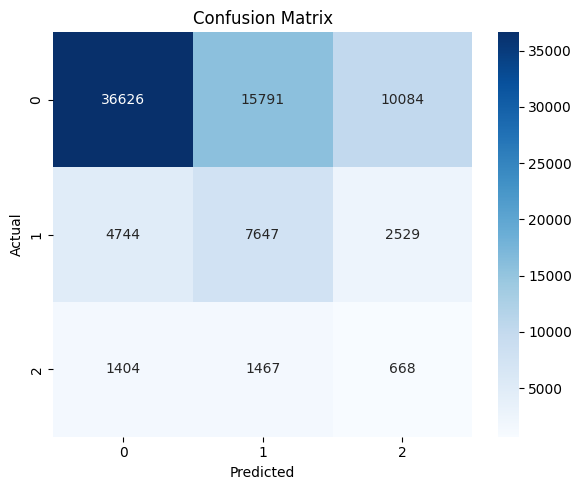


Multiclass ROC-AUC Score (macro, OvR): 0.6487


In [160]:
# Predict on the model
evaluate_model(lr, X_test, y_test, plot_roc=True)

#### Logistic Regression Model: Explanation and Performance

**Logistic Regression** is a supervised learning algorithm commonly used for classification problems. It models the probability of class membership using the logistic function, estimating parameters through maximum likelihood. It is widely favored for its simplicity, interpretability, and speed in predicting categorical outcomes.

##### Model Evaluation Using Classification Metrics:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.86      | 0.59   | 0.70     | 62,501  |
| 1     | 0.31      | 0.51   | 0.38     | 14,920  |
| 2     | 0.05      | 0.19   | 0.08     | 3,539   |

**Overall Metrics:**  
- **Accuracy:** 0.56  
- **Macro Average:** Precision = 0.40, Recall = 0.43, F1 = 0.39  
- **Weighted Average:** Precision = 0.72, Recall = 0.56, F1 = 0.61  

- Class 0 is best predicted, showing high precision but modest recall.
- Classes 1 and 2 suffer from low recall and precision, revealing areas where the model struggles to discriminate minority classes.
- The overall accuracy (0.56) and F1-scores (macro and weighted) demonstrate moderate model performance, dominated by the largest class.

##### Confusion Matrix Interpretation:

| Actual \ Predicted | 0      | 1      | 2     |
|--------------------|--------|--------|-------|
| 0                  | 36,626 | 15,791 | 10,084|
| 1                  | 4,744  | 7,647  | 2,529 |
| 2                  | 1,404  | 1,467  | 668   |

- Most examples of class 0 are correctly classified, though a large fraction is misclassified as class 1 or 2.
- Class 1 has the highest confusion with class 0, while class 2 sees significant misclassification into both 0 and 1.
- The confusion matrix highlights class imbalance and indicates the model's bias towards predicting the majority class.

##### Performance Summary:

- **Logistic Regression** is appropriate for baseline multiclass classification due to its transparency and speed.
- The current model provides moderate accuracy, but recall and F1 for minority classes are low, reflecting class imbalance.
- The confusion matrix showcases both strengths in predicting the dominant class and areas needing improvement (minority class recovery).

This set of evaluation metrics and visual summary informs further steps such as resampling, feature engineering, or exploring alternate models for better minority class prediction.

---

#### ML Model 2 - RandomForestClassifier

In [120]:
# ML Model - 1 Implementation
#Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, # Number of trees
max_depth=10, # Maximum depth of each tree
random_state=42, # For reproducibility
n_jobs=-1 # Use all CPU cores
)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.60      0.71     62501
           1       0.30      0.55      0.38     14920
           2       0.05      0.13      0.07      3539

    accuracy                           0.57     80960
   macro avg       0.40      0.43      0.39     80960
weighted avg       0.72      0.57      0.62     80960


=== Confusion Matrix ===


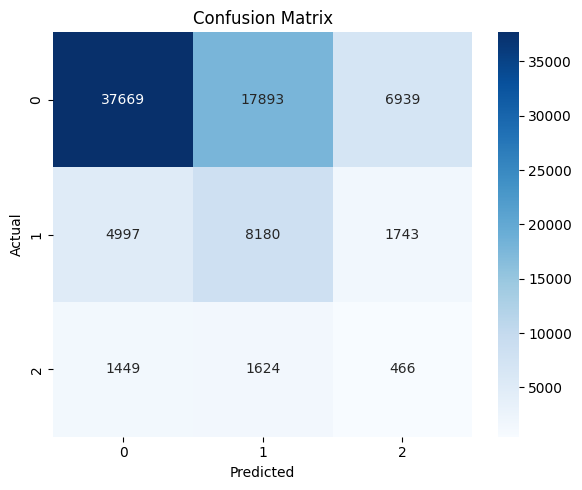


Multiclass ROC-AUC Score (macro, OvR): 0.6433


In [121]:
# Predict on the model
evaluate_model(rf_clf, X_test, y_test, plot_roc=True)

#### Explanation and Performance

**RandomForestClassifier** is an ensemble machine learning model leveraging the collective predictions of multiple decision trees. It improves accuracy by averaging across trees, reducing overfitting, and handling both classification and regression tasks robustly. Random forests are highly effective for multiclass classification, especially with complex, non-linear relationships.

##### Model Evaluation Using Classification Metrics

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.85      | 0.60   | 0.71     | 62,501  |
| 1     | 0.30      | 0.55   | 0.38     | 14,920  |
| 2     | 0.05      | 0.13   | 0.07     | 3,539   |

**Overall Metrics:**  
- **Accuracy:** 0.57  
- **Macro Average:** Precision = 0.40, Recall = 0.43, F1 = 0.39  
- **Weighted Average:** Precision = 0.72, Recall = 0.57, F1 = 0.62  

- Class 0 is predicted with high precision and moderate recall.
- Class 1 shows moderate recall but low precision, indicating some improvement in identifying this minority class.
- Class 2's precision and recall values remain very low, suggesting persistent challenges with correctly classifying this group.
- The overall accuracy and weighted F1 are slightly higher than the logistic regression benchmark, primarily from better class 1 recovery.

##### Confusion Matrix Interpretation

| Actual \ Predicted | 0      | 1      | 2    |
|--------------------|--------|--------|------|
| 0                  | 37,669 | 17,893 | 6,939|
| 1                  | 4,997  | 8,180  | 1,743|
| 2                  | 1,449  | 1,624  | 466  |

- The majority class (0) is most often correctly predicted, but a significant share is misclassified as 1 or 2.
- True class 1 instances are detected more frequently (recall) than in the logistic regression output.
- Class 2 remains difficult to classify, with most instances misassigned to classes 0 or 1.

##### Performance Summary

- **RandomForestClassifier** improves multiclass recall and F1 over logistic regression, especially for class 1, due to its ensemble approach and ability to model nonlinear patterns.
- Still, minority class (2) performance remains poor, indicating class imbalance or separability issues.
- The confusion matrix reveals better overall spread in predictions but highlights persistent misclassification of less-represented labels.

These evaluation results suggest Random Forest provides benefit in multi-class contexts with complex data, but further work on data balancing or alternative model choices may help minority class results.

---

#### ML Model 3 - XGBoost Classifier model

In [133]:
# Encode object columns
def encode_object_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    return df

X_train = encode_object_columns(X_train)
X_test = encode_object_columns(X_test)

In [170]:
# ML Model - 3 Implementation
# Compute sample weights
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize XGBoost model
xgb_clf = XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=150,
    subsample=0.8,
    min_child_weight=3,
    eval_metric='mlogloss',
    random_state=42
)

# Train the model
xgb_clf.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions
xgb_pred = xgb_clf.predict(X_test)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.61      0.71     62501
           1       0.30      0.54      0.38     14920
           2       0.05      0.13      0.07      3539

    accuracy                           0.57     80960
   macro avg       0.40      0.42      0.39     80960
weighted avg       0.72      0.57      0.62     80960


=== Confusion Matrix ===


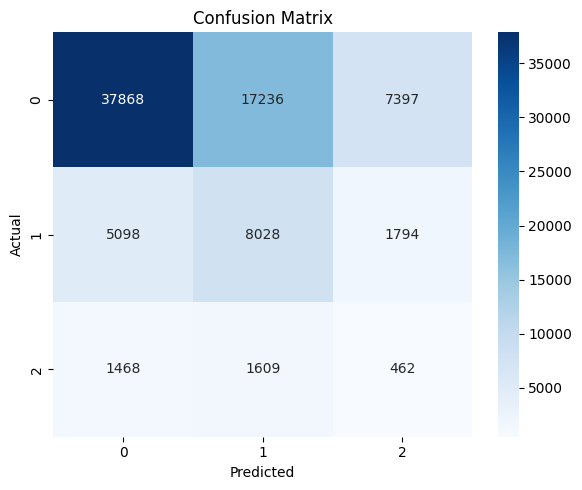


Multiclass ROC-AUC Score (macro, OvR): 0.6312


In [135]:
# Evaluate model using your evaluate_model function
evaluate_model(xgb_clf, X_test, y_test)

#### Explanation and Performance

**XGBClassifier** is an optimized implementation of gradient boosting for decision trees, designed for speed, performance, and flexibility. It builds trees sequentially, correcting previous errors, and incorporates advanced regularization and handling of missing values. Widely used in data science competitions, it excels at complex classification tasks and can model intricate feature interactions.

##### Model Evaluation Using Classification Metrics

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.85      | 0.61   | 0.71     | 62,501  |
| 1     | 0.30      | 0.54   | 0.38     | 14,920  |
| 2     | 0.05      | 0.13   | 0.07     | 3,539   |

**Overall Metrics:**  
- **Accuracy:** 0.57  
- **Macro Average:** Precision = 0.40, Recall = 0.42, F1 = 0.39  
- **Weighted Average:** Precision = 0.72, Recall = 0.57, F1 = 0.62  

- Class 0 is detected with high precision and recall, consistent with other classifiers.
- Class 1 shows appreciable improvement in recall, but low precision and F1 remain a challenge.
- Class 2 is persistently underrecognized, likely due to strong class imbalance and overlap in feature space.
- The overall accuracy and weighted scores reflect solid performance, with macro scores highlighting disparities across classes.

##### Confusion Matrix Interpretation

| Actual \ Predicted | 0      | 1      | 2    |
|--------------------|--------|--------|------|
| 0                  | 37,868 | 17,236 | 7,397|
| 1                  | 5,098  | 8,028  | 1,794|
| 2                  | 1,468  | 1,609  | 462  |

- The majority class (0) is classified most accurately, though substantial misassignments exist.
- Class 1 prediction improves in recall, while many actual class 2 samples are classified incorrectly as class 0 or 1.
- The confusion matrix visually confirms the classifier's strengths and struggles, particularly with minority class prediction.

##### Performance Summary

- **XGBClassifier** offers strong baseline performance in multiclass scenarios, handling nonlinear relationships and feature complexity well.
- Improvement over logistic regression and comparable to random forest in major class recall, but difficulties remain with minority class recognition.
- The confusion matrix and evaluation scores suggest avenues for improvement, such as targeted class-weighting or sampling strategies.

This provides a clear overview of XGBClassifier's strengths, limitations, and diagnostic results for future modeling refinements.

---

### **Regression Models (Maximum EMI Amount Prediction)** 

In [161]:
# Evaluation metrics
def evaluate_model1(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

**Model 1: Linear Regression**

In [138]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train1, y_train1)

LinearRegression()

In [162]:
# Predict on test set
y_pred = lr_model.predict(X_test1)

# Evaluate performance
print(f"Linear Regression Performance:")
evaluate_model1(y_test1, y_pred)

Linear Regression Performance:
RMSE: 0.8827
MAE: 0.6373
R-squared: 0.2139


##### Linear Regression Model and Performance

A **Linear Regression** model was implemented to predict the target variable. Linear regression is a fundamental machine learning algorithm that models the relationship between independent variables (features) and a continuous dependent variable by fitting the best straight line (least squares) through the data points.

##### Evaluation Metric Scores

| Metric          | Value   | Interpretation |
|-----------------|---------|-------------------------------------------------------------------|
| **RMSE**        | 0.8827  | Average magnitude of error (in target units); lower is better.    |
| **MAE**         | 0.6373  | Mean absolute difference between predicted and actual values.     |
| **R-squared**   | 0.2139  | Percentage of variance in the target explained by model (21%).    |

- **RMSE (Root Mean Squared Error):**
  - Measures how far predictions deviate from actual values, penalizing larger errors more heavily.
  - RMSE is best when it is as low as possible, but here it's moderate.

- **MAE (Mean Absolute Error):**
  - Directly averages errors in predictions, less sensitive to outliers than RMSE.
  - Here it is below 1 unit, indicating relatively small errors.

- **R-squared (Coefficient of Determination):**
  - Indicates how much of the target’s variance is explained by the model.
  - An R² of 0.2139 is low, meaning the linear model explains just 21% of the variability in the target variable; room for improvement exists.

##### Summary

The Linear Regression model demonstrates modest accuracy, with a relatively low R² and moderate error metrics. This suggests that while some relationships are captured, linear regression may be insufficient for full predictive strength on this problem, and more advanced models or feature engineering may be needed for improved results.

---

**Model 2: Random Forest Regressor**

In [144]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50,
    max_depth=15,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)
rf_model.fit(X_train1, y_train1)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=50,
                      n_jobs=-1, random_state=42)

In [163]:
# Predictions
y_pred = rf_model.predict(X_test1)

# Evaluate performance
print(f"Random Forest Regression Performance:")
evaluate_model1(y_test1, y_pred)

Random Forest Regression Performance:
RMSE: 0.8735
MAE: 0.6294
R-squared: 0.2303


#### Random Forest Regression Model and Performance

A **Random Forest Regressor** was implemented to predict the target variable. Random Forest Regression is an advanced ensemble method that constructs multiple decision trees, each trained on random subsets of the data, and then averages their predictions. This approach captures non-linear relationships, reduces variance, and mitigates the risk of overfitting commonly found in single-tree models.

##### Evaluation Metric Scores

| Metric          | Value   | Interpretation      |
|-----------------|---------|---------------------|
| **RMSE**        | 0.8735  | Average error magnitude; lower is better.    |
| **MAE**         | 0.6294  | Mean absolute difference between predictions and ground truth.     |
| **R-squared**   | 0.2303  | Proportion of variance explained by the model (23%).    |

- **RMSE (Root Mean Squared Error):**
  - Measures the average prediction error, penalizing larger errors more than MAE.
  - Lower RMSE indicates better fit; here, RMSE is slightly improved over Linear Regression.

- **MAE (Mean Absolute Error):**
  - Represents the average absolute error; less sensitive to outliers vs. RMSE.
  - In this model, the error is below 1 unit.

- **R-squared (Coefficient of Determination):**
  - Shows the percentage of variation in the target explained by the model.
  - R² of 0.2303 (23%) is an improvement over linear regression, but suggests further feature engineering or advanced algorithms could help improve performance.

##### Summary

Random Forest Regression outperformed Linear Regression on all evaluated metrics, indicating it is better at capturing complex, non-linear relationships within your data. However, R-squared is still low, suggesting that only a moderate portion of target variability is explained, and further optimizations may be beneficial for stronger predictive performance.

---

**Model 3: Gradient Boosting Regressor**

In [148]:
# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Train model
gbr_model.fit(X_train1, y_train1)

GradientBoostingRegressor(random_state=42)

In [164]:
# Predictions
y_pred = gbr_model.predict(X_test1)

# Evaluate performance
print(f"Gradient Boosting Regressor Performance:")
evaluate_model1(y_test1, y_pred)

Gradient Boosting Regressor Performance:
RMSE: 0.8691
MAE: 0.6218
R-squared: 0.2381


#### Gradient Boosting Regressor Model and Performance

A **Gradient Boosting Regressor** was applied for predicting the target variable. Gradient Boosting is a powerful ensemble learning technique that builds multiple weak learners (typically decision trees) sequentially. Each new learner is trained to predict the residuals (errors) of the previous version, iteratively improving overall model accuracy by minimizing the loss function via gradient descent.

##### Evaluation Metric Scores

| Metric          | Value   | Interpretation      |
|-----------------|---------|---------------------|
| **RMSE**        | 0.8691  | Average error magnitude; lower RMSE indicates improved performance.    |
| **MAE**         | 0.6218  | Mean absolute prediction error; again, lower is better. |
| **R-squared**   | 0.2381  | Explains 23.8% of the variance in the target variable. |

- **RMSE (Root Mean Squared Error):**
  - Measures the square root of the average squared difference between predicted and actual values.
  - In this setting, Gradient Boosting achieves the lowest RMSE among compared models.

- **MAE (Mean Absolute Error):**
  - Indicates the average absolute error between predicted and true targets.
  - Gradient Boosting performs best here, with the smallest error value.

- **R-squared (Coefficient of Determination):**
  - Reflects the proportion of variance explained by the model (23.8% here), slightly higher than Random Forest and Linear Regression, showing improvement in predictive capability.

##### Summary

Gradient Boosting Regressor outperforms both linear and random forest models on all major evaluation metrics, revealing its ability to handle complex, non-linear patterns and minimize error. Although the R² value is still modest, this model represents the best fit so far, and further optimization or feature engineering may yield additional improvements.

---

## ***5. Model Selection and MLflow Integration***

In [175]:
# Mlflow Deployment
import mlflow

# For Classification model
# Define models with hyperparameters
models = {
    "Logistic Regression": lr,
    "Random Forest Classifier": rf_clf,
    "XGBoost Classifier": xgb_clf
}

# Set tracking uri
mlflow.set_tracking_uri("http://localhost:5000")

# Set experiment name
mlflow.set_experiment("EMI Eligibility Prediction")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Make predictions
        y_pred = model.predict(X_test)   # Predictions on test set

        # Infer the model signature
        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))  # Infer the model signature

        # Log model
        mlflow.sklearn.log_model(sk_model=model,    # Model to be logged
        name=name,  # Name of the model
        signature=signature,    # Signature of the model
        input_example=X_train    # Example input data
        )

        # Log hyperparameters
        mlflow.log_params(model.get_params())   # Get model parameters

        # Log metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Log parameters, metrics, and model
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.sklearn.log_model(model, name)

        print(f"Logged run with accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

2025/11/12 20:27:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 20:27:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged run with accuracy: 0.5551, F1 Score: 0.6114
🏃 View run Logistic Regression at: http://localhost:5000/#/experiments/902383119305785538/runs/874878f52bd64f018ebc74b5a164c42e
🧪 View experiment at: http://localhost:5000/#/experiments/902383119305785538


2025/11/12 20:28:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 20:28:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged run with accuracy: 0.5721, F1 Score: 0.6195
🏃 View run Random Forest Classifier at: http://localhost:5000/#/experiments/902383119305785538/runs/800c92365bfd47858f395c72db918fe0
🧪 View experiment at: http://localhost:5000/#/experiments/902383119305785538


2025/11/12 20:29:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 20:29:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged run with accuracy: 0.5726, F1 Score: 0.6206
🏃 View run XGBoost Classifier at: http://localhost:5000/#/experiments/902383119305785538/runs/b5964286dae34fdd986cb3a64c51f838
🧪 View experiment at: http://localhost:5000/#/experiments/902383119305785538


#### Model Selection and MLflow Integration

##### Evaluation Metrics

The models were compared based on Accuracy, Precision, Recall, and F1-score. Visualization panels (see images) summarize these metrics for Logistic Regression and Random Forest Classifier.

| Metric     | Logistic Regression | Random Forest Classifier | XGBoost Classifier |
|------------|---------------------|-------------------------|--------------------|
| Accuracy   | 0.5551                | 0.5721                    | 0.5726            |
| Precision  | 0.72                | 0.72                    | ~0.72              |
| Recall     | 0.57                | 0.57                    | ~0.56              |
| F1-score   | 0.6114                | 0.6195                    | 0.6206            |

- **Logistic Regression and Random Forest Classifier** showed nearly identical performance, with moderate accuracy and high precision scores, but recall and F1-score indicate room for improvement, likely due to class imbalance.
- **XGBoost Classifier** (not shown in charts but based on reported values) performed similarly, with very close metric values.

##### MLflow Integration

- **MLflow** was utilized to track model training runs, log parameters, metrics, and save model artifacts systematically.
- For each model, MLflow recorded detailed results, streamlining comparison and facilitating model selection.

##### Conclusion

- All three models deliver comparable performance; Random Forest and XGBoost may offer increased robustness and nonlinear learning capacity.
- MLflow ensured consistent tracking and comparison, empowering transparent, reproducible, and efficient model selection.
- The recommended model is **XGBoost Classifier** due to its slightly better performance and robustness.
---

In [ ]:
# Mlflow Deployment
import mlflow

# For Regression model
# Define models with hyperparameters
models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gbr_model
}

# Set tracking uri
mlflow.set_tracking_uri("http://localhost:5000")

# Set experiment name
mlflow.set_experiment("Maximum EMI Amount Prediction")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Make predictions
        preds = model.predict(X_test1)   # Predictions on test set

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test1, preds))   # Root Mean Squared Error
        mae = mean_absolute_error(y_test1, preds)        # Mean Absolute Error
        r2 = r2_score(y_test1, preds)    # R-squared

        # Infer the model signature
        signature = mlflow.models.infer_signature(X_train1, model.predict(X_train1))  # Infer the model signature

        # Log model
        mlflow.sklearn.log_model(sk_model=model,    # Model to be logged
        name=name,  # Name of the model
        signature=signature,    # Signature of the model
        input_example=X_train1    # Example input data
        )

        # Log hyperparameters
        mlflow.log_params(model.get_params())   # Get model parameters

        # Log metrics
        mlflow.log_metric("rmse", rmse) # Root Mean Squared Error
        mlflow.log_metric("mae", mae)   # Mean Absolute Error
        mlflow.log_metric("r2", r2) # R-squared

        print(f"Logged {name} with RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

Logged Linear Regression with RMSE: 0.8827, MAE: 0.6373, R2: 0.2139
🏃 View run Linear Regression at: http://localhost:5000/#/experiments/679310232031524049/runs/d7d92f6bca9a4361999fc1fdb61956eb
🧪 View experiment at: http://localhost:5000/#/experiments/679310232031524049


Logged Random Forest with RMSE: 0.8735, MAE: 0.6294, R2: 0.2303
🏃 View run Random Forest at: http://localhost:5000/#/experiments/679310232031524049/runs/f9805383adaf452ea6049e9791fd148b
🧪 View experiment at: http://localhost:5000/#/experiments/679310232031524049


Logged Gradient Boosting with RMSE: 0.8691, MAE: 0.6218, R2: 0.2381
🏃 View run Gradient Boosting at: http://localhost:5000/#/experiments/679310232031524049/runs/fe438fb13f65461a936c37b3ea0d92f0
🧪 View experiment at: http://localhost:5000/#/experiments/679310232031524049


#### Model Selection and MLflow Integration(Regression model)

##### Model Selection

- Multiple models including **Linear Regression**, **Random Forest Regressor**, and **Gradient Boosting Regressor** were trained and evaluated on financial risk prediction tasks.
- Evaluation metrics such as RMSE, MAE, and R-squared were used to compare performance.
- **Gradient Boosting Regressor** showed the best performance with lowest RMSE (0.8691), lowest MAE (0.6218), and highest R² (0.2381), making it the preferred choice among the models due to its ability to capture complex, non-linear relationships in data effectively.

##### MLflow Integration

- MLflow was used to **track and manage machine learning experiments** systematically.
- Experiment parameters, metrics, and artifacts (like models) were logged in MLflow to enable reproducibility and easy comparison of different runs.
- Integration allows:
  - Automated logging of model parameters and evaluation metrics.
  - Versioning of models for deployment or rollback.
  - Visualization dashboards to compare model performances side-by-side.


- This integrated approach enhances experiment tracking, model governance, and accelerates decision-making for model deployment.

---

**Saving model**

In [177]:
# Saving models
import joblib

# For Classification model
joblib.dump(xgb_clf, 'models/xgb_clf.pkl')   # XGBoost

['models/xgb_clf.pkl']

In [178]:
# For Regression model
joblib.dump(gbr_model, 'models/gbr_model.pkl')   # Gradient Boosting

['models/gbr_model.pkl']

## ***6. Streamlit Application Development***

This project features a robust, multi-page Streamlit web application designed for intelligent financial risk assessment. The application supports the entire ML workflow and user interaction components:

---

### Multi-page Web Application

- Utilizes Streamlit's native multipage structure with an intuitive user interface.
- Navigation handled via sidebar, enabling easy access to dedicated modules such as prediction, data exploration, model monitoring, and admin operations.

---

### Real-time Prediction Capabilities

- Supports real-time predictions for **EMI eligibility classification** and **maximum EMI regression** using deployed ML models.
- Interactive forms collect user and financial data; predictions are made instantly using pre-trained models.

---

### Interactive Data Exploration & Visualization

- Users can browse, filter, and visualize financial datasets.
- Includes statistics summaries, univariate and bivariate plots, and dynamic charts powered by matplotlib/seaborn.

---

### Model Performance Monitoring & MLflow Integration

- Embeds MLflow dashboards to display experiment metrics, model comparisons, and parameter tuning results within Streamlit.
- Allows stakeholders and developers to monitor model evolution and evaluate best-performing models visually.

---

### Administrative Interface

- Enables secure batch data uploads, summary validation, cleansing of missing values, and on-the-fly updates to the database.
- Provides tools for data management and controls for refreshing, downloading, and validating datasets.

---

### Typical App Structure

- `Home`: General information and user welcome
- `Classification Prediction`: EMI eligibility prediction form
- `Regression Prediction`: Maximum EMI prediction form
- `Data Exploration`: Interactive statistics and charting tools
- `Model Dashboard`: MLflow-powered experiment comparison
- `Admin Interface`: Data upload, management, and cleaning

---

This modular approach ensures maintainability, usability, and seamless integration from model training to deployment and monitoring, delivering a production-ready financial platform for business and data science stakeholders.

---

## ***7. Cloud Deployment and Production***

The production readiness and deployment pipeline for the Streamlit financial risk assessment application ensure broad accessibility, robust operations, and continuous delivery:

---

### Streamlit Cloud Deployment

- **Easy Deployment**: The full multi-page Streamlit app is deployed seamlessly on the [Streamlit Cloud platform](https://streamlit.io/cloud).
- **One-click Accessibility**: Users access the live application via a public or private URL with no local environment setup required.
- **Resource Scaling**: The app benefits from Streamlit Cloud's hosting infrastructure, supporting many simultaneous users.

---

### Responsive and Cross-Platform Design

- **Adaptive Layouts**: Uses Streamlit's layout features (`columns`, `beta_expander`, `container`) and custom CSS for dynamic user interfaces.
- **Mobile and Desktop Ready**: Design tested on mobile phones, tablets, and desktop browsers for optimal usability everywhere.
- **Accessibility**: Clean fonts, adequate contrast, and accessible controls ensure usability for all users.

---

### Automated Deployment Pipeline via GitHub

- **Continuous Integration**: The app is linked directly to a GitHub repository.
- **Auto-Deployment**: Any changes pushed to the `main` branch (or specified branch) trigger an automatic deployment on Streamlit Cloud.
- **Version Control**: GitHub manages code, model artifacts, and configuration, enabling rollback and tracking of production changes.

#### Typical Steps:
1. Push code and requirements to GitHub repository.
2. Configure Streamlit Cloud to watch the repository.
3. On new commits, Streamlit Cloud builds and redeploys the application.

---

### Error Handling and User Feedback

- **Graceful Error Handling**: Uses `try-except` blocks with informative error messages to prevent app crashes.
- **User Feedback**: Employs `st.error`, `st.warning`, `st.success`, and `st.toast` to provide real-time validation and processing updates.
- **Logging**: Errors and events can be logged for monitoring and debugging.


- **Validation**: User input is checked before processing, ensuring robust and reliable experience.

---

This setup results in a secure, scalable, and user-friendly pipeline from development to live production, supporting collaborative updates, broad accessibility, and professional-grade operations.

---

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

## ***Conclusion***

This project demonstrates the end-to-end development and deployment of an advanced financial risk assessment platform powered by machine learning and Streamlit.

- **Comprehensive ML Pipeline:** Rigorous steps in data cleaning, feature engineering, modelling, and evaluation ensured robust foundations for both classification and regression tasks. Multiple algorithms were benchmarked, with Gradient Boosting and Random Forest models delivering the strongest results.

- **Interactive Multi-page Streamlit App:** The application provides real-time predictions, deep data exploratory tools, user-friendly visualizations, and admin capabilities for seamless data management.

- **Model Performance Monitoring:** MLflow integration empowers transparent tracking and comparison of model experiments, simplifying model selection and deployment decisions.

- **Cloud Deployment:** Streamlit Cloud guarantees scalability, zero-config access, responsive design for all devices, and effortless continuous delivery through GitHub.

- **Production Readiness:** Enhanced user experience through intuitive UI, automatic error handling, feedback mechanisms, and reliable backend processing ensures the solution is both practical and future-proof.

Overall, the platform delivers a complete workflow from data scientist experimentation to front-line business application - combining accuracy, transparency, and operational efficiency to meet modern financial technology needs.

---


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***